<a href="https://colab.research.google.com/github/JoseAaronE/FisicaComputacional/blob/master/Actividad10/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 10

Esquivel Ovilla José Aarón

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Solución Numérica de la Ecuación del Calor

La ecuación del calor es de la forma

\begin{equation*}
\frac{\partial u}{\partial t} = \kappa \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} +
\frac{\partial^2 u}{\partial z^2} \right)
\end{equation*}

donde la constante $\kappa$ es el coefficiente de difusividad. 

La Ecuación del Calor describe el flujo de calor en una región mediante los cambios de la Temperatura $u(x,t)$.

En un medio unidimensional $x$, la ecuación se simplifica 

\begin{equation*}
\frac{\partial u}{\partial t} = \kappa \left( \frac{\partial^2 u}{\partial x^2}
\right)
\end{equation*}

### Resolviendo la Ecuación de Calor mediante Diferencias Finitas.

El **método de diferencias finitas** utiliza Series de Taylor para aproximar las derivadas.

**Aproximación de la primer derivada.**

Si se conoce el valor de una función $f(x)$ en un punto $x_0$, se puede conocer el valor en una vecindad $x_0 + h$, con $h$ pequeño, utilzando una Serie de Taylor

\begin{equation*}
f(x_0+h) \approx f(x_0) + \frac{h}{1!}f'(x_0) +  \mathcal{O}(h^2)
\end{equation*}

de la ecuación anterior, obtenemos el valor aproximado de la primer derivada

\begin{equation*}
f'(x_0) \approx \frac{f(x_0 +h) - f(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}

El término $\mathcal{O}(h^2)$ denota términos de orden $h^2$ y superior. 

Esta aproximación de la primera derivada, se le conoce como *diferencias finitas de* $f'(x_0)$ *hacia enfrente*, porque involucra un punto hacia enfrente en la derivada.

De la misma forma se obtiene el término de diferencias finitas hacia atrás

\begin{equation*}
f'(x_0) \approx \frac{f(x_0) - f(x_0-h)}{h} + \mathcal{O}(h^2)
\end{equation*}

Podemos promediar las dos ecuaciones anteriores y se obtiene una *diferencia finita centrada* de orden superior

\begin{equation*}
f'(x_0) \approx \frac{f(x_0 +h) - f(x_0 -h)}{2h} + \mathcal{O}(h^3)
\end{equation*}

**Aproximación de la segunda derivada**

Podemos utilizar esta última ecuación para calcular la aproximación de la segunda derivada

\begin{equation*}
f''(x_0) \approx \frac{f'(x_0 +h) - f'(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}

y substituimos $f(x_0 + h)$ por una *diferencia finita hacia atrás*

\begin{equation*}
f'(x_0 +h) \approx \frac{f(x_0 +h) - f(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}

y la derivada $f'(x_0)$ por una *diferencia finita hacia atrás* 

\begin{equation*}
f'(x_0) \approx \frac{f(x_0) - f(x_0 -h)}{h} + \mathcal{O}(h^2)
\end{equation*}

Finalmente obtenemos la *diferencia finita centrada de segundo orden* para $f''(x_0)$ que involucra los valores en 3 puntos. 

\begin{equation*}
f''(x_0) \approx \frac{f(x_0 +h) - 2 f(x_0) + f(x_0 -h)}{h^2} + \mathcal{O}(h^3)
\end{equation*}

**Solución de la Ecuación de Calor por un método híbrido (EDP > EDO)**. 

Podemos escribir la ecuación del calor como

\begin{eqnarray*}
\frac{\partial u(x,t)}{\partial t} & = & \kappa \frac{\partial^2 u(x,t)}{\partial x^2} \\
 & \approx & \kappa \frac{u(x+h,t) - 2 u(x,t) + u(x-h,t)}{h^2} 
\end{eqnarray*}

y luego integrar en el tiempo como si tuviéramos una ecuación diferencial ordinaria.

Formalmente, para un determinado punto ($jh,t$), tendremos la ecuación diferencial ordinaria $u(jh,t) = u_j(t)$

\begin{equation*}
\frac{d u_j(t)}{dt} = 
\kappa \frac{u_{j+1}(t) - 2 u_j(t) + u_{j-1}(t)}{h^2} 
\end{equation*}

para la cual requerimos proporcionar la condición inicial al tiempo $t=0$

\begin{equation*}
u(0) = f(x)
\end{equation*}

Y condiciones a la frontera:
* $u_0 = c_1, u_N = c_2$, para el tipo de Dirichlet
* Del tipo Neumann, $du_0/dx = 0$ ó $dx_N/dx=0$, para casos de equilibrio térmico.

**Condiciones a la frontera tipo Neumann**

Tenemos que definir cómo estimar la derivada en la frontera, digamos en la frontera $x=L$.  Recordando que estamos usando un aproximación de segundo orden para $\partial^2 u/\partial x^2$, debemos encontrar una aproximación para la primer derivada también de orden $h^2$

\begin{eqnarray*}
\frac{du}{dx} & = & \frac{u_{N+1} - u_{N-1}}{2h} = 0 \\
            u_{N+1}  & = & u_{N-1} \\  
\end{eqnarray*}

aunque formalmente $u_{N+1}$ esta "fuera" de nuestro dominio, pero utilizamos esto para determinar la ecuación que se satisface en la frontera, reemplazando $u_{N+1}   =  u_{N-1}$ en la ecuación del calor obteniendo

\begin{equation*}
\frac{d u_N(t)}{dt} = 
\kappa \frac{2 u_{N-1}(t) - 2 u_N(t)}{h^2} 
\end{equation*}

**Ejercicio 1:**

Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:

**Caso a)** 

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$.
Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.

Tenemos la ecuación de calor 
\begin{eqnarray*}
\frac{\partial u(x,t)}{\partial t} & = & \kappa \frac{\partial^2 u(x,t)}{\partial x^2} \\
 & \approx & \kappa \frac{u(x+h,t) - 2 u(x,t) + u(x-h,t)}{h^2} 
\end{eqnarray*}

In [ ]:
#Definimos una función para las diferencias finitas centradas de segundo orden
def df(u,t):
#Ponemos que la barra vale 0 
    dudt = np.zeros(x0.shape)
    #Condiciones de frontera 
    #Punto inicial 
    dudt[0] = 10.0
    #último punto 
    dudt[-1] =0
    #Constante de difusión de calor 
    k = 80
    #Hacemos un for para poder calcular la temperatura en los puntos interiores 1 a N-1
    for i in range(1, N-1):
      #Lado derecho de la ecuación
          dudt[i] = k*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt


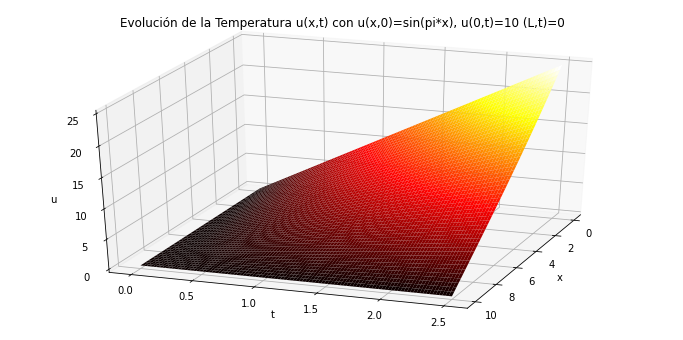

In [ ]:
#Parámetros 
#Longitud de la barra 
a = 0 
b = 10

#Tiempo inicial y final de integración 
ti = 0
tf = 2.5

#Número de puntos en la dirección x
N = 51

#Tamaño de delta x
h = (b-a)/(N-1)

#Los puntos en el dominio x
x = np.linspace(a, b, N);

#Condición inicial u(x,0)=sin(pi*x)
x0 = np.zeros(x.shape)

#Puntos de integración en el tiempo
tint = np.linspace(ti, tf, 100);

#Obtenemos la solución usando scipy.integrate.odeint
sol = odeint(df, x0, tint)

#Hacemos la gráfica en 3d
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x,tint)

ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=10 (L,t)=0')
plt.show()

Probamos con el método de diferencias finitas 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: The following kwargs were not used by contour: 'lw'


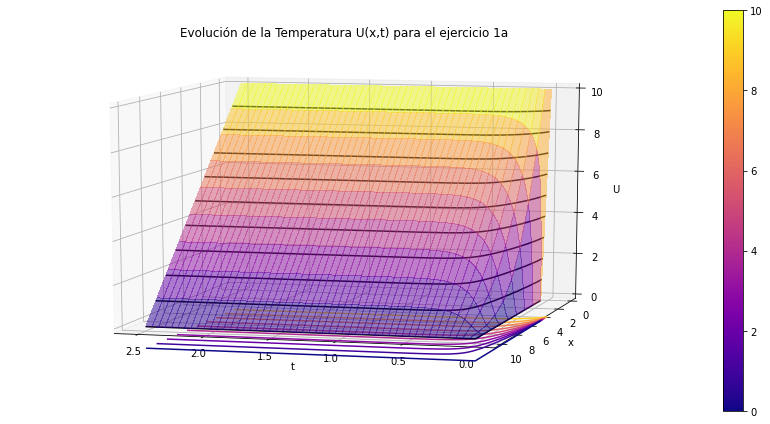

In [ ]:
M = 10 # Número de puntos en el eje x
N = 5000 # Número de puntos en el tiempo

#Longitud de la barra 
x0 = 0
xf = 10 

#Tiempo inicial y final de integración 
ti = 0
tf = 2.5

dx = (xf - x0) / (M - 1) # tamaño discretización en x
dt = (tf - ti) / (N - 1) # tamaño de la dicretización en t

#Constante de difusión de calor
kappa = 100 

#Puntos de integración en el tiempo
tint = np.linspace(ti,tf,N)
#Los puntos en el dominio x
x = np.linspace(x0,xf,M)
# Malla 
U = np.zeros((M,N))

#Condiciones iniciales
U[:, 0] = 0
U[0, :] = 10
U[-1, :] = 0
# Coeficiente en la Ecuación
alpha = kappa * dt / dx**2 
#Diferencias finitas 
for k in range(0, N-1): 
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tint, x)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='plasma',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="plasma", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='plasma')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) para el ejercicio 1a')

# Punto del observador 
ax.view_init(elev=10, azim=105)

plt.tight_layout()
plt.show()


**Caso b)** 

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'lw'


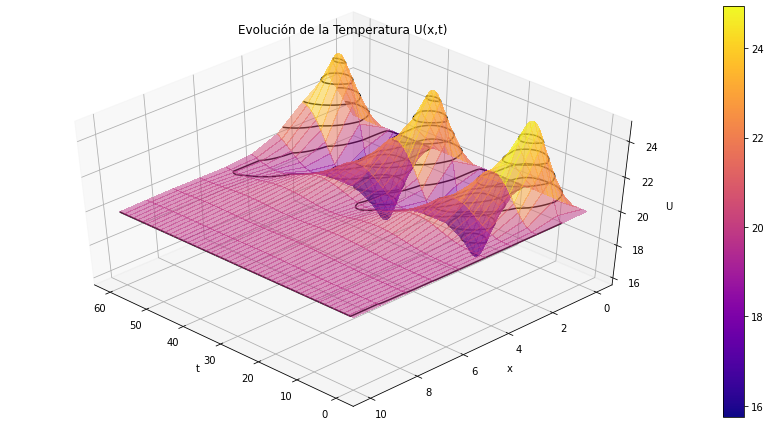

In [ ]:
M = 10 # Número de puntos en el eje x
N = 5000 # Número de puntos en el tiempo

#Longitud de la barra 
x0 = 0
xf = 10 

#Constante de difusión de calor
kappa = 0.25 

#Tiempo inicial y final de integración 
ti = 0
tf = 60
#distancia entre los puntos puntos en x
dx = (xf - x0) / (M - 1) 
#distancia entre los puntos puntos en t
dt = (tf - ti) / (N - 1) # tamaño de la dicretización en t

#Puntos de integración en el tiempo
tint = np.linspace(ti,tf,N)
#Los puntos en el dominio x
x = np.linspace(x0,xf,M)
# Malla 
U = np.zeros((M,N))

#Condiciones iniciales
U[:, 0] = 20
#U[0, :] = 10
U[-1, :] = 20
# Coeficiente en la Ecuación
alpha = kappa * dt / dx**2 
#Diferencias finitas 
for k in range(0, N-1): 
    U[0, :] = 20+10*np.sin(np.pi*k*dt/12)
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tint, x)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='plasma',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="plasma", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='plasma')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) ')

# Punto del observador 
ax.view_init(elev=45, azim=135)

plt.tight_layout()
plt.show()

**Problema 2:**

**Variaciones de la Temperatura en el Suelo**

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera. 

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como 

\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}

donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos. 

Usando la Ecuación de Calor, determina numéricamente  la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

Realiza una simulación de al menos 48 horas.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: The following kwargs were not used by contour: 'lw'


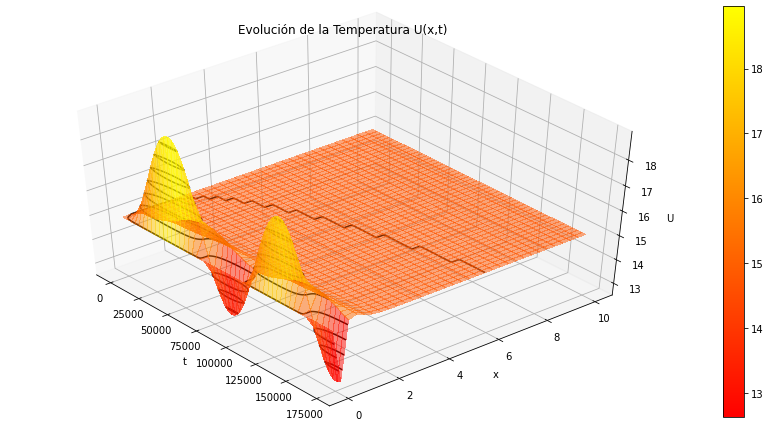

In [ ]:
M = 33 # Número de puntos en el eje x
N = 15001  # Número de puntos en el tiempo

#Longitud de la barra 
x0 = 0
xf = 10 

#Constante de difusión de calor
kappa = 1e-6 

#Tiempo inicial y final de integración 
#Tiempo total de 48 hrs
ti = 0
tf = 172800
#distancia entre los puntos puntos en x
dx = (xf - x0) / (M - 1) 
#distancia entre los puntos puntos en t
dt = (tf - ti) / (N - 1) # tamaño de la dicretización en t

#Puntos de integración en el tiempo
tint = np.linspace(ti,tf,N)
#Los puntos en el dominio x
x = np.linspace(x0,xf,M)
# Malla 
U = np.zeros((M,N))
#Condiciones iniciales
U[:, 0] = 15
U[-1, :] = 15
#Condiciones iniciales, para poder usar en el for
ua = 20
u0 = 15
#constante de el periodo de variación diaria de temperatura 
p = 86400
alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación
#Diferencias finitas 
for k in range(0, N-1): 
    U[0, :] = u0+ua*np.sin(2*np.pi*k*dt/p)
    for i in range(1, M-1): 
        U[i, k+1] = alpha * U[i-1, k] + (1-2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tint, x)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='autumn',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="autumn", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='autumn')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) ')

# Punto del observador 
ax.view_init(elev=45, azim=-40)

plt.tight_layout()
plt.show()